# Machine Learning for classification problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Toy dataset

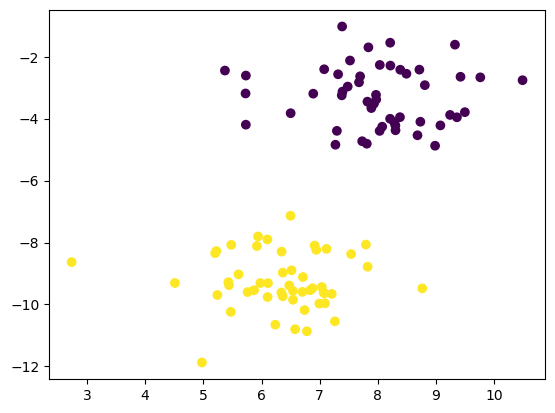

In [2]:
# load and plot data
X = np.loadtxt("data/logistic_regression/toy_logistic_X.csv", delimiter = ",")
y = np.loadtxt("data/logistic_regression/toy_logistic_y.csv", delimiter = ",")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

class LogisticRegression:
    def __init__ (self, num_features):
        self.weights = np.random.random_sample((num_features + 1,1))
        
    def fit(self, X, y, epochs, learning_rate):
        # NOTE: matrix X must have 1s in the first column
        self.costs=[]

        N = X.shape[0]
                
        for i in range(epochs):
            # compute sigma(Xw)
            output = self.activation(X)
            errors = output-y
            # update weights
            self.weights -= learning_rate/N*X.T @ errors
            # compute the cost
            cost = -y.T @ np.log(output)-(1 - y.T) @ np.log(1 - output)
            self.costs.append(cost.item())
        
    def activation(self, X):
        return sigmoid(X @ self.weights)   
        
    def predict(self, X):
        return np.where(self.activation(X)>=0.5,1,0)

In [4]:
# shuffling the dataset
data = np.c_[X,y]
np.random.shuffle(data)
num_features = X.shape[1]
X_shuffled = data[:,:num_features]
y_shuffled = data[:,num_features]

In [5]:
# standardization of the dataset
mean_X = np.mean(X_shuffled, axis= 0)
std_X = np.std(X_shuffled, axis = 0)
X_norm = (X_shuffled-mean_X)/std_X

In [6]:
# train-test split
X_train=X_norm[:70]
X_test=X_norm[70:]
y_train=y_shuffled[:70].reshape(-1,1)
y_test=y_shuffled[70:].reshape(-1,1)

# adding column of ones
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

In [7]:
lr = LogisticRegression(num_features=2)
lr.fit(X=X_train, y=y_train, epochs=1000, learning_rate=0.1)

y_pred=lr.predict(X_test)
print('Misclassifications:',(y_test!=y_pred).sum())

Misclassifications: 0


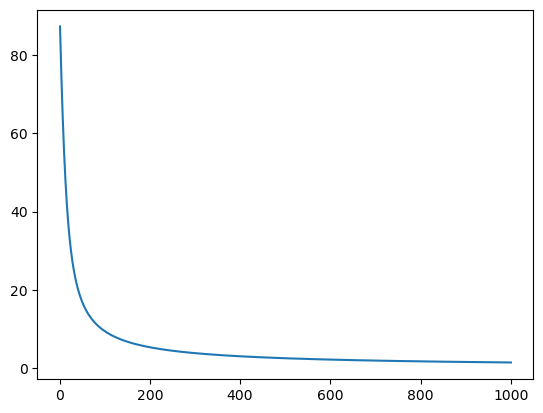

In [8]:
# Ploting cost value vs number of iterations
plt.plot(np.arange(1,len(lr.costs)+1,1),lr.costs)
plt.show()